In [187]:
import pandas as pd

df = pd.read_csv(r"your_xyz_data.xyz", sep='\t',header=None)
pd.set_option('display.float_format', '{:.10e}'.format)
df.columns = ['x', 'y', 'z']

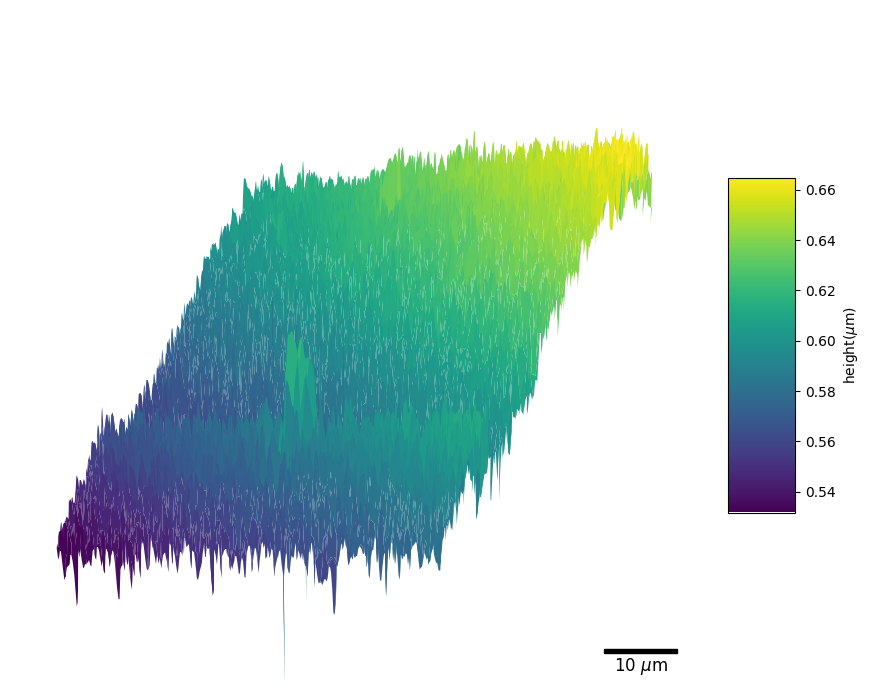

In [188]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import numpy as np

x_unique = np.unique(df['x'])
y_unique = np.unique(df['y'])
x_grid, y_grid = np.meshgrid(x_unique, y_unique)

from scipy.interpolate import griddata
z_grid = griddata((df['x'], df['y']), df['z']*1e6, (x_grid, y_grid), method='cubic')

x_min, x_max = np.percentile(df['x'], [3, 97])  
y_min, y_max = np.percentile(df['y'], [3, 97])
z_min, z_max = np.percentile(z_grid[~np.isnan(z_grid)], [3, 97])
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

plt.axis('off')
cbar = plt.colorbar(surf, shrink=0.5, aspect=5, label='height($\mu$m)')  
fontprops = fm.FontProperties(size=12)
sizebar = AnchoredSizeBar(ax.transData,
                          0.02, '10 $\mu$m', 'lower right', 
                          pad=0.1,
                          color='black',
                          frameon=False,
                          size_vertical=0.001,
                          fontproperties=fontprops)

ax.add_artist(sizebar)
plt.tight_layout() 

plt.savefig('3d_flat_sample.pdf')
plt.show()


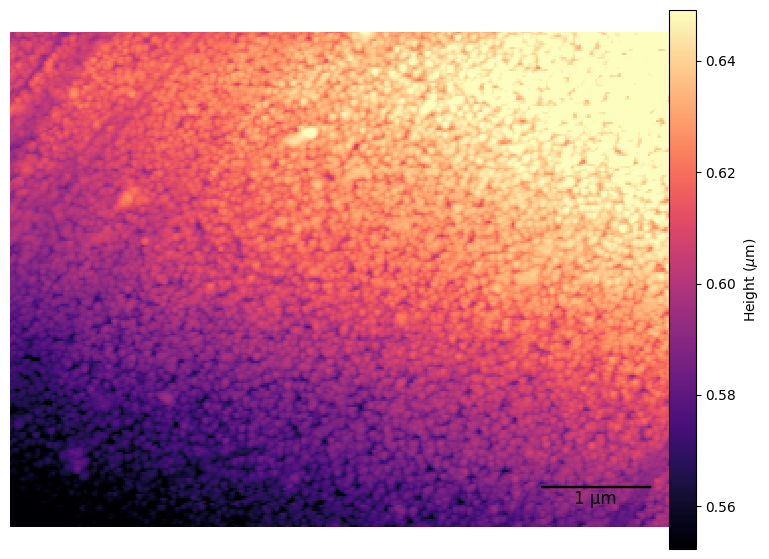

In [195]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import numpy as np

x_unique = np.unique(df['x'])
y_unique = np.unique(df['y'])
x_grid, y_grid = np.meshgrid(x_unique, y_unique)

z_values_adjusted = df['z'] * 1e6

z_min, z_max = z_values_adjusted.quantile([0.05, 0.95])

z_values_clipped = np.clip(z_values_adjusted, z_min, z_max)

z_grid = griddata((df['x'], df['y']), z_values_clipped, (x_grid, y_grid), method='cubic')

plt.figure(figsize=(10, 7))
pcolormesh = plt.pcolormesh(x_grid, y_grid, z_grid, cmap='magma')

plt.colorbar(pcolormesh, label='Height ($\mu$m)', pad=0)
plt.axis('square')
plt.xlim(0,6e-6)
plt.ylim(1.5e-6,6e-6)
plt.axis('off')
scalebar = AnchoredSizeBar(plt.gca().transData,
                           1e-6, '1 µm', 'lower right', 
                           pad=1,
                           color='black',
                           frameon=False,
                           size_vertical=0.1e-7,
                           fontproperties=fm.FontProperties(size=12))
plt.gca().add_artist(scalebar)

plt.savefig('flat_sample_surface.pdf')
plt.show()